# Library

In [1]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import gridspec
import glob
import cartopy.crs as ccrs
from matplotlib.pyplot import cm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab


# Load Data

In [2]:
data_control_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam5_new/CESM_output_data/atm/hist/*") #End of year control
data_control_last18=data_control_path[24:240] # Get years 3-20
data_control_data = xr.open_mfdataset(data_control_last18,combine="by_coords",use_cftime=True)
data_control = data_control_data.mean('time') # Average over the last 18 years


data_00_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam_00_w100/CESM_output_data/atm/hist/*")
data_00_last18=data_00_path[24:240] # Get years 3-20
data_00_data = xr.open_mfdataset(data_00_last18,combine="by_coords",use_cftime=True)
data_00 = data_00_data.mean('time') # Average over the last 18 years


data_25_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam_25_n_w100/CESM_output_data/atm/hist/*")
data_25_last18=data_25_path[24:240] # Get years 3-20
data_25_data = xr.open_mfdataset(data_25_last18,combine="by_coords",use_cftime=True)
data_25_n = data_25_data.mean('time') # Average over the last 18 years

data_50_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_50_n_w100/CESM_output_data/atm/hist/*")
data_50_last18=data_50_path[24:240] # Get years 3-20
data_50_data = xr.open_mfdataset(data_50_last18,combine="by_coords",use_cftime=True)
data_50_n = data_50_data.mean('time') # Average over the last 18 years

data_75_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_75_n_w100/CESM_output_data/atm/hist/*")
data_75_last18=data_75_path[24:240] # Get years 3-20
data_75_data = xr.open_mfdataset(data_75_last18,combine="by_coords",use_cftime=True)
data_75_n = data_75_data.mean('time') # Average over the last 18 years

data_100_path=glob.glob("/data/keeling/a/mailes2/a/CESM_DATA/wide_100/outputdata/atm/hist/*")
data_100_last18=data_100_path[24:240] # Get years 3-20
data_100_data = xr.open_mfdataset(data_100_last18,combine="by_coords",use_cftime=True)
data_100_n = data_100_data.mean('time') # Average over the last 18 years

data_125_path=glob.glob("/data/keeling/a/mailes2/a/CESM_DATA/wide_125/outputdata/atm/hist/*")
data_125_last18=data_125_path[24:240] # Get years 3-20
data_125_data = xr.open_mfdataset(data_125_last18,combine="by_coords",use_cftime=True)
data_125_n = data_125_data.mean('time') # Average over the last 18 years

In [5]:
data_4k_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_4k/CESM_output_data/atm/hist/*")
data_4k_last18=data_4k_path[24:240] # Get years 3-20
data_4k_data = xr.open_mfdataset(data_4k_last18,combine="by_coords",use_cftime=True)
data_4k = data_4k_data.mean('time') # Average over the last 18 years

# SST

In [10]:
zero=data_00.TS.mean('lon')-data_control.TS.mean('lon')
twentyfive=data_25_n.TS.mean('lon')-data_control.TS.mean('lon')
fifty=data_50_n.TS.mean('lon')-data_control.TS.mean('lon')
seventyfive=data_75_n.TS.mean('lon')-data_control.TS.mean('lon')
hundred=data_100_n.TS.mean('lon')-data_control.TS.mean('lon')
hundredtwentyfive=data_125_n.TS.mean('lon')-data_control.TS.mean('lon')

stwentyfive=twentyfive.assign_coords(lat=list(reversed(twentyfive.lat)))
sfifty=fifty.assign_coords(lat=list(reversed(fifty.lat)))
sseventyfive=seventyfive.assign_coords(lat=list(reversed(seventyfive.lat)))
shundred=hundred.assign_coords(lat=list(reversed(hundred.lat)))
shundredtwentyfive=hundertwentyfive.assign_coords(lat=list(reversed(hundertwentyfive.lat)))


In [11]:
sum_patches=zero+twentyfive+fifty+seventyfive+hundred+hundredtwentyfive+ \
            +stwentyfive+sfifty+sseventyfive+shundred+shundredtwentyfive

Exp_4k = data_4k.TS.mean('lon')-data_control.TS.mean('lon')


Text(0.5, 0, 'Latitude/deg')

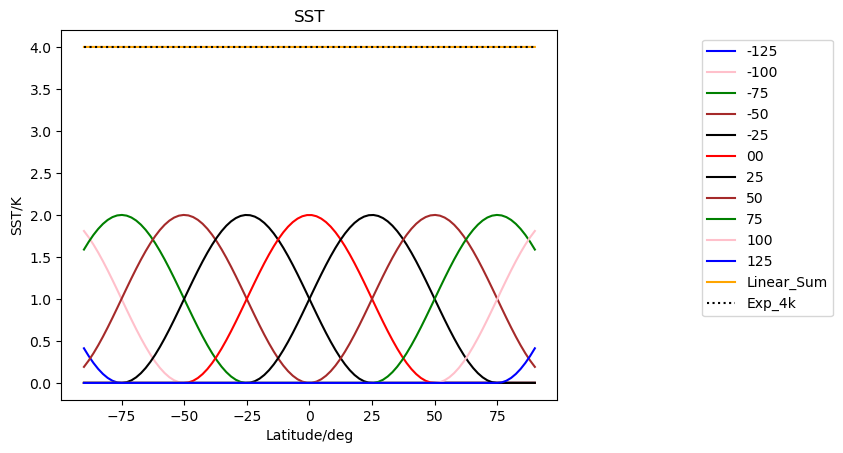

In [13]:
shundredtwentyfive.plot(label="-125", color='blue')
shundred.plot(label="-100", color='pink')
sseventyfive.plot(label="-75", color='green')
sfifty.plot(label="-50", color='brown')
stwentyfive.plot(label="-25", color='black')
zero.plot(label="00", color='red')
twentyfive.plot(label="25", color='black')
fifty.plot(label="50", color='brown')
seventyfive.plot(label="75", color='green')
hundred.plot(label="100", color='pink')
hundredtwentyfive.plot(label="125", color='blue')

sum_patches.plot(label="Linear_Sum", color='orange')
Exp_4k.plot(label="Exp_4k", linestyle='dotted', color='black')
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor = (1.57, 0.6), loc='center right')
plt.title('SST')
plt.ylabel('SST/K')
plt.xlabel('Latitude/deg')

# TOA Color Plot

In [14]:
TOA_flux_exp_minus_control_00 = (data_00.FSNT.mean('lon')-data_00.FLNT.mean('lon'))-\
                                (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_25_n = (data_25_n.FSNT.mean('lon')-data_25_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_50_n = (data_50_n.FSNT.mean('lon')-data_50_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_75_n = (data_75_n.FSNT.mean('lon')-data_75_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_100_n = (data_100_n.FSNT.mean('lon')-data_100_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_125_n = (data_125_n.FSNT.mean('lon')-data_125_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_25_s=TOA_flux_exp_minus_control_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))

TOA_flux_exp_minus_control_50_s=TOA_flux_exp_minus_control_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))

TOA_flux_exp_minus_control_75_s=TOA_flux_exp_minus_control_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))

TOA_flux_exp_minus_control_100_s=TOA_flux_exp_minus_control_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))

TOA_flux_exp_minus_control_125_s=TOA_flux_exp_minus_control_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))



In [21]:
Sum_TOA= TOA_flux_exp_minus_control_00+TOA_flux_exp_minus_control_25_n+TOA_flux_exp_minus_control_50_n+\
         TOA_flux_exp_minus_control_75_n+TOA_flux_exp_minus_control_100_n+TOA_flux_exp_minus_control_125_n+\
         TOA_flux_exp_minus_control_25_s+TOA_flux_exp_minus_control_50_s+TOA_flux_exp_minus_control_75_s+\
         TOA_flux_exp_minus_control_100_s+TOA_flux_exp_minus_control_125_s

TOA_flux_exp_minus_control_Exp_4k = (data_4k.FSNT.mean('lon')-data_4k.FLNT.mean('lon'))-\
                                                    (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

In [22]:
pp_total=np.array(Sum_TOA)
exp_total=np.linspace(0,1,96)
plat_total=np.array(Sum_TOA.lat)
expp_total, ppp_total=np.meshgrid(exp_total, pp_total)

pp_Exp_4k=np.array(TOA_flux_exp_minus_control_Exp_4k)
exp_Exp_4k=np.linspace(0,1,96)
plat_Exp_4k=np.array(TOA_flux_exp_minus_control_Exp_4k.lat)
expp_Exp_4k, ppp_Exp_4k=np.meshgrid(exp_Exp_4k, pp_Exp_4k)

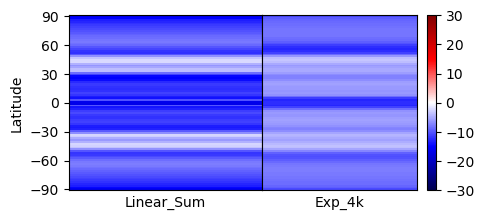

In [24]:
nrow = 1
ncol = 3
fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0)
vmax=30
vmin=-30
plt.subplot(gs[0,0])
plt.pcolormesh(expp_total,plat_total,ppp_total,cmap='seismic',vmax=vmax,vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("Linear_Sum")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_Exp_4k,plat_Exp_4k,ppp_Exp_4k,cmap='seismic',vmax=vmax,vmin=vmin)
plt.xticks([])
plt.xlabel("Exp_4k")
ax = pylab.gca()
ax.yaxis.set_visible(False)

plt.colorbar(shrink=1)
plt.show()

In [26]:
#short wave of TOA flux
sTOA_flux_exp_minus_control_00 = (data_00.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_25_n = (data_25_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_50_n = (data_50_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_75_n = (data_75_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_100_n = (data_100_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_125_n = (data_125_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_25_s=sTOA_flux_exp_minus_control_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
sTOA_flux_exp_minus_control_50_s=sTOA_flux_exp_minus_control_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
sTOA_flux_exp_minus_control_75_s=sTOA_flux_exp_minus_control_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
sTOA_flux_exp_minus_control_100_s=sTOA_flux_exp_minus_control_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
sTOA_flux_exp_minus_control_125_s=sTOA_flux_exp_minus_control_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

#long wave of TOA flux
lTOA_flux_exp_minus_control_00 = (data_00.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_25_n = (data_25_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_50_n = (data_50_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_75_n = (data_75_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_100_n = (data_100_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_125_n = (data_125_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_25_s=lTOA_flux_exp_minus_control_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
lTOA_flux_exp_minus_control_50_s=lTOA_flux_exp_minus_control_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
lTOA_flux_exp_minus_control_75_s=lTOA_flux_exp_minus_control_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
lTOA_flux_exp_minus_control_100_s=lTOA_flux_exp_minus_control_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
lTOA_flux_exp_minus_control_125_s=lTOA_flux_exp_minus_control_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))



In [27]:
sSum_TOA=sTOA_flux_exp_minus_control_00+sTOA_flux_exp_minus_control_25_n+sTOA_flux_exp_minus_control_25_s+\
            sTOA_flux_exp_minus_control_50_n+sTOA_flux_exp_minus_control_50_s+\
            sTOA_flux_exp_minus_control_75_n+sTOA_flux_exp_minus_control_75_s+\
            sTOA_flux_exp_minus_control_100_n+sTOA_flux_exp_minus_control_100_s+\
            sTOA_flux_exp_minus_control_125_n+sTOA_flux_exp_minus_control_125_s


sTOA_flux_exp_minus_control_Exp_4k = (data_4k.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))


lSum_TOA=lTOA_flux_exp_minus_control_00+lTOA_flux_exp_minus_control_25_n+lTOA_flux_exp_minus_control_25_s+\
        lTOA_flux_exp_minus_control_50_n+lTOA_flux_exp_minus_control_50_s+\
        lTOA_flux_exp_minus_control_75_n+lTOA_flux_exp_minus_control_75_s+\
        lTOA_flux_exp_minus_control_100_n+lTOA_flux_exp_minus_control_100_s+\
        lTOA_flux_exp_minus_control_125_n+lTOA_flux_exp_minus_control_125_s

lTOA_flux_exp_minus_control_Exp_4k = (data_4k.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))



In [28]:
pp_total=np.array(sSum_TOA)
exp_total=np.linspace(0,1,96)
plat_total=np.array(sSum_TOA.lat)
expp_total, ppp_total=np.meshgrid(exp_total, pp_total)

pp_Exp_4k=np.array(sTOA_flux_exp_minus_control_Exp_4k)
exp_Exp_4k=np.linspace(0,1,96)
plat_Exp_4k=np.array(sTOA_flux_exp_minus_control_Exp_4k.lat)
expp_Exp_4k, ppp_Exp_4k=np.meshgrid(exp_Exp_4k, pp_Exp_4k)

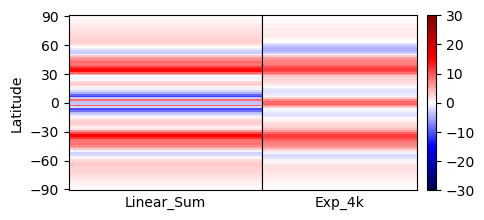

In [32]:
nrow = 1
ncol = 3
fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0)
vmax=30
vmin=-30
plt.subplot(gs[0,0])
plt.pcolormesh(expp_total,plat_total,ppp_total,cmap='seismic',vmax=vmax,vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("Linear_Sum")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_Exp_4k,plat_Exp_4k,ppp_Exp_4k,cmap='seismic',vmax=vmax,vmin=vmin)
plt.xticks([])
plt.xlabel("Exp_4k")
ax = pylab.gca()
ax.yaxis.set_visible(False)

plt.colorbar(shrink=1)
plt.show()

In [33]:
pp_total=np.array(lSum_TOA)
exp_total=np.linspace(0,1,96)
plat_total=np.array(lSum_TOA.lat)
expp_total, ppp_total=np.meshgrid(exp_total, pp_total)

pp_Exp_4k=np.array(lTOA_flux_exp_minus_control_Exp_4k)
exp_Exp_4k=np.linspace(0,1,96)
plat_Exp_4k=np.array(lTOA_flux_exp_minus_control_Exp_4k.lat)
expp_Exp_4k, ppp_Exp_4k=np.meshgrid(exp_Exp_4k, pp_Exp_4k)

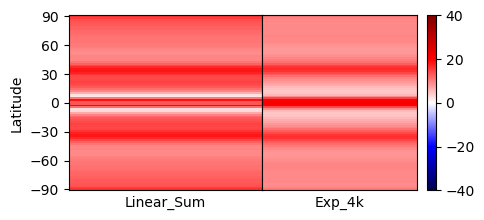

In [37]:
nrow = 1
ncol = 3
fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0)
vmax=40
vmin=-40
plt.subplot(gs[0,0])
plt.pcolormesh(expp_total,plat_total,ppp_total,cmap='seismic',vmax=vmax,vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("Linear_Sum")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_Exp_4k,plat_Exp_4k,ppp_Exp_4k,cmap='seismic',vmax=vmax,vmin=vmin)
plt.xticks([])
plt.xlabel("Exp_4k")
ax = pylab.gca()
ax.yaxis.set_visible(False)

plt.colorbar(shrink=1)
plt.show()

# TOA Zonal Plot

In [38]:
TOA_00 = (data_00.FSNT.mean('lon')-data_00.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_25_n = (data_25_n.FSNT.mean('lon')-data_25_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_25_s=TOA_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
TOA_50_n = (data_50_n.FSNT.mean('lon')-data_50_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_50_s=TOA_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
TOA_75_n = (data_75_n.FSNT.mean('lon')-data_75_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_75_s=TOA_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
TOA_100_n = (data_100_n.FSNT.mean('lon')-data_100_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_100_s=TOA_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
TOA_125_n = (data_125_n.FSNT.mean('lon')-data_125_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_125_s=TOA_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))


Qs_00=(-data_00.FLNS.mean('lon')+data_00.FSNS.mean('lon')-data_00.SHFLX.mean('lon')-data_00.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_25_n=(-data_25_n.FLNS.mean('lon')+data_25_n.FSNS.mean('lon')-data_25_n.SHFLX.mean('lon')-data_25_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_25_s=Qs_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
Qs_50_n=(-data_50_n.FLNS.mean('lon')+data_50_n.FSNS.mean('lon')-data_50_n.SHFLX.mean('lon')-data_50_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_50_s=Qs_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
Qs_75_n=(-data_75_n.FLNS.mean('lon')+data_75_n.FSNS.mean('lon')-data_75_n.SHFLX.mean('lon')-data_75_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_75_s=Qs_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
Qs_100_n=(-data_100_n.FLNS.mean('lon')+data_100_n.FSNS.mean('lon')-data_100_n.SHFLX.mean('lon')-data_100_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_100_s=Qs_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
Qs_125_n=(-data_125_n.FLNS.mean('lon')+data_125_n.FSNS.mean('lon')-data_125_n.SHFLX.mean('lon')-data_125_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_125_s=Qs_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))



In [39]:
Sum_TOA_zonal=TOA_00+TOA_25_n+TOA_25_s+TOA_50_n+TOA_50_s+TOA_75_n+TOA_75_s+TOA_100_n+TOA_100_s+TOA_125_n+TOA_125_s
Sum_Qs_zonal=Qs_00+Qs_25_s+Qs_25_n+Qs_50_s+Qs_50_n+Qs_75_s+Qs_75_n+Qs_100_s+Qs_100_n+Qs_125_s+Qs_125_n

TOA_Exp_4k=(data_4k.FSNT.mean('lon')-data_4k.FLNT.mean('lon'))-\
                 (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

Qs_Exp_4k=(-data_4k.FLNS.mean('lon')+data_4k.FSNS.mean('lon')-\
                 data_4k.SHFLX.mean('lon')-data_4k.LHFLX.mean('lon'))-\
                (-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-\
                 data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))


Sum_Qa_zonal=Sum_Qs_zonal-Sum_TOA_zonal
Qa_Exp_4k=Qs_Exp_4k-TOA_Exp_4k

Text(0, 0.5, 'TOA/W/m2')

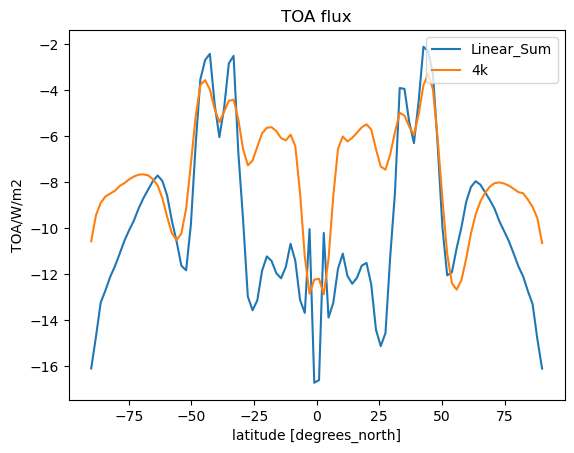

In [40]:
Sum_TOA_zonal.plot(label='Linear_Sum')
TOA_Exp_4k.plot(label='4k')
plt.legend(loc='upper right')
plt.title('TOA flux')
plt.ylabel('TOA/W/m2')

Text(0, 0.5, 'W/m2')

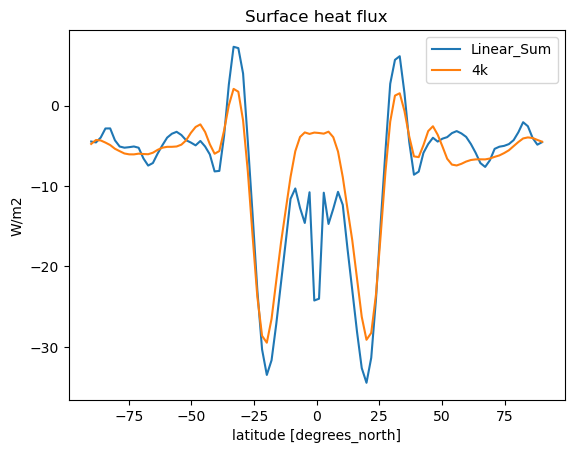

In [41]:
Sum_Qs_zonal.plot(label='Linear_Sum')
Qs_Exp_4k.plot(label='4k')
plt.legend(loc='upper right')
plt.title('Surface heat flux')
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

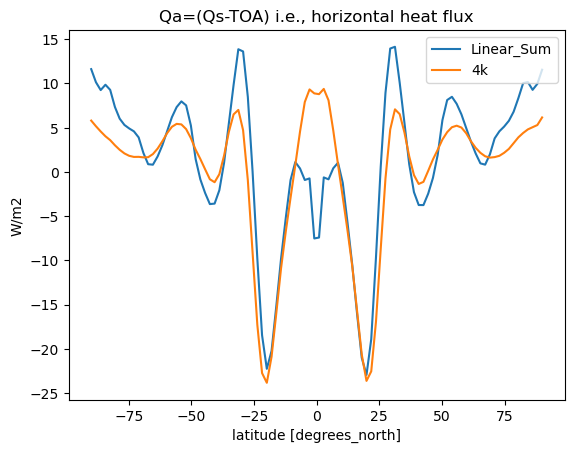

In [42]:
Sum_Qa_zonal.plot(label='Linear_Sum')
Qa_Exp_4k.plot(label='4k')
plt.legend(loc='upper right')
plt.title('Qa=(Qs-TOA) i.e., horizontal heat flux')
plt.ylabel('W/m2')

In [43]:
#SW
sTOA_00 = (data_00.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_25_n = (data_25_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_25_s=sTOA_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
sTOA_50_n = (data_50_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_50_s=sTOA_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
sTOA_75_n = (data_75_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_75_s=sTOA_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
sTOA_100_n = (data_100_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_100_s=sTOA_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
sTOA_125_n = (data_125_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_125_s=sTOA_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

sTOA_flux_exp_minus_control_Exp_4k = (data_4k.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_sum=sTOA_00+sTOA_25_n+sTOA_25_s+sTOA_50_n+sTOA_50_s+sTOA_75_n+sTOA_75_s+sTOA_100_n+sTOA_100_s+sTOA_125_n+sTOA_125_s

#LW
lTOA_00 = (data_00.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_25_n = (data_25_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_25_s=lTOA_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
lTOA_50_n = (data_50_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_50_s=lTOA_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
lTOA_75_n = (data_75_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_75_s=lTOA_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
lTOA_100_n = (data_100_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_100_s=lTOA_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
lTOA_125_n = (data_125_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_125_s=lTOA_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

lTOA_flux_exp_minus_control_Exp_4k = (data_4k.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_sum=lTOA_00+lTOA_25_n+lTOA_25_s+lTOA_50_n+lTOA_50_s+lTOA_75_n+lTOA_75_s+lTOA_100_n+lTOA_100_s+lTOA_125_n+lTOA_125_s

Text(0.5, 1.0, 'SW TOA flux')

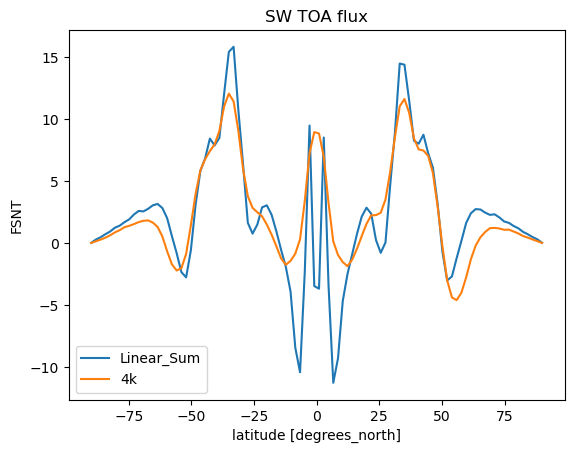

In [44]:
sTOA_sum.plot( label='Linear_Sum')
sTOA_flux_exp_minus_control_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title('SW TOA flux')

Text(0.5, 1.0, 'LW TOA flux')

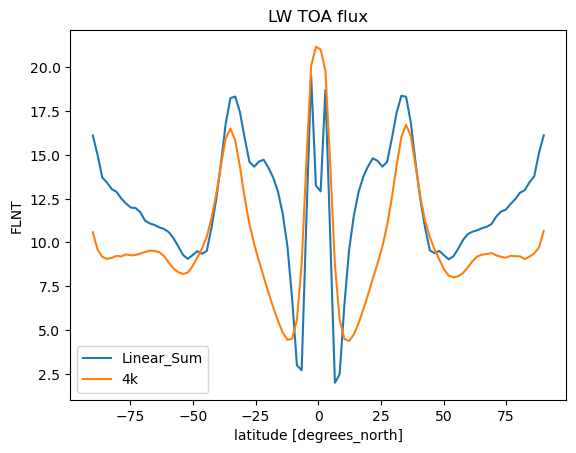

In [45]:
lTOA_sum.plot( label='Linear_Sum')

lTOA_flux_exp_minus_control_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title('LW TOA flux')

# Vertical Temperature

In [46]:
T_00=data_00.T.mean('lon')-data_control.T.mean('lon')
T_25_n=data_25_n.T.mean('lon')-data_control.T.mean('lon')
T_25_s=T_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
T_50_n=data_50_n.T.mean('lon')-data_control.T.mean('lon')
T_50_s=T_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
T_75_n=data_75_n.T.mean('lon')-data_control.T.mean('lon')
T_75_s=T_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
T_100_n=data_100_n.T.mean('lon')-data_control.T.mean('lon')
T_100_s=T_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
T_125_n=data_125_n.T.mean('lon')-data_control.T.mean('lon')
T_125_s=T_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))


In [47]:
T_sum=T_00+T_25_s+T_25_n+T_50_s+T_50_n+T_75_s+T_75_n+T_100_s+T_100_n+T_125_s+T_125_n
T_Exp_4k=data_4k.T.mean('lon')-data_control.T.mean('lon')


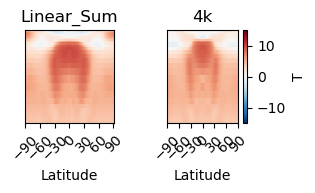

In [60]:
nrow = 1
ncol = 7
fig = plt.figure(figsize=(25, 20))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(14, 14)
gs.update(wspace=0.6)
vmax=15
vmin=-15
plt.subplot(gs[0,0])
T_sum.plot(vmax=vmax, vmin=vmin,yincrease=False, cmap='RdBu_r',add_colorbar=False)
#plt.yscale("log")
plt.title('Linear_Sum')
ax = pylab.gca()
ax.yaxis.set_visible(False)
#plt.hlines(y=1000, xmin=-5, xmax=15, colors='black', linestyles='-', lw=5, label='Single Short Line')
plt.xticks([-90, -60,-30,0,30,60,90])
plt.xticks(rotation=45)
plt.xlabel('Latitude')

plt.subplot(gs[0,1])
T_Exp_4k.plot(vmax=vmax, vmin=vmin,yincrease=False, cmap='RdBu_r')
#plt.yscale("log")
plt.title('4k')
ax = pylab.gca()
#plt.hlines(y=1000, xmin=-10, xmax=10, colors='black', linestyles='-', lw=5, label='Single Short Line')
plt.xticks([-90, -60,-30,0,30,60,90])
plt.yticks([1000, 800, 600,400,200])
plt.xticks(rotation=45)
plt.xlabel('Latitude')

# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,6])
#plt.colorbar()
plt.show()

# All SKY, CLEAR SKY, CRE

In [49]:
#clear sky short wave
css_00=data_00.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_25_n=data_25_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_25_s=css_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
css_50_n=data_50_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_50_s=css_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
css_75_n=data_75_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_75_s=css_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
css_100_n=data_100_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_100_s=css_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
css_125_n=data_125_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_125_s=css_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

css_total=css_00+css_25_n+css_25_s+css_50_n+css_50_s+css_75_n+css_75_s+css_100_n+css_100_s+css_125_n+css_125_s
css_Exp_4k=data_4k.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')




#clear sky long wave
csl_00=data_00.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_25_n=data_25_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_25_s=csl_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
csl_50_n=data_50_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_50_s=csl_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
csl_75_n=data_75_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_75_s=csl_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
csl_100_n=data_100_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_100_s=csl_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
csl_125_n=data_125_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_125_s=csl_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

csl_total=csl_00+csl_25_n+csl_25_s+csl_50_n+csl_50_s+csl_75_n+csl_75_s+csl_100_n+csl_100_s+csl_125_n+csl_125_s
csl_Exp_4k=data_4k.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')




#all sky short wave
ass_00=data_00.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_25_n=data_25_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_25_s=ass_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
ass_50_n=data_50_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_50_s=ass_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
ass_75_n=data_75_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_75_s=ass_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
ass_100_n=data_100_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_100_s=ass_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
ass_125_n=data_125_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_125_s=ass_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

ass_total=ass_00+ass_25_n+ass_25_s+ass_50_n+ass_50_s+ass_75_n+ass_75_s+ass_100_n+ass_100_s+ass_125_n+ass_125_s
ass_Exp_4k=data_4k.FSNT.mean('lon')-data_control.FSNT.mean('lon')




#all sky long wave
asl_00=data_00.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_25_n=data_25_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_25_s=asl_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
asl_50_n=data_50_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_50_s=asl_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
asl_75_n=data_75_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_75_s=asl_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
asl_100_n=data_100_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_100_s=asl_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
asl_125_n=data_125_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_125_s=asl_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

asl_total=asl_00+asl_25_n+asl_25_s+asl_50_n+asl_50_s+asl_75_n+asl_75_s+asl_100_n+asl_100_s+asl_125_n+asl_125_s
asl_Exp_4k=data_4k.FLNT.mean('lon')-data_control.FLNT.mean('lon')




#CRE short wave-zonal
CRES_00 = (data_00.FSNT.mean('lon')-data_00.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_25_n = (data_25_n.FSNT.mean('lon')-data_25_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_25_s=CRES_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
CRES_50_n = (data_50_n.FSNT.mean('lon')-data_50_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_50_s=CRES_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
CRES_75_n = (data_75_n.FSNT.mean('lon')-data_75_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_75_s=CRES_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
CRES_100_n = (data_100_n.FSNT.mean('lon')-data_100_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_100_s=CRES_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
CRES_125_n = (data_125_n.FSNT.mean('lon')-data_125_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_125_s=CRES_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

CRES_total=CRES_00+CRES_25_n+CRES_25_s+CRES_50_n+CRES_50_s+CRES_75_n+CRES_75_s+CRES_100_n+CRES_100_s+CRES_125_n+CRES_125_s
CRES_Exp_4k=(data_4k.FSNT.mean('lon')-data_4k.FSNTC.mean('lon'))-\
                    (data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))



#CRE Long wave-zonal
CREL_00 = (data_00.FLNT.mean('lon')-data_00.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_25_n = (data_25_n.FLNT.mean('lon')-data_25_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_25_s=CREL_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
CREL_50_n = (data_50_n.FLNT.mean('lon')-data_50_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_50_s=CREL_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
CREL_75_n = (data_75_n.FLNT.mean('lon')-data_75_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_75_s=CREL_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
CREL_100_n = (data_100_n.FLNT.mean('lon')-data_100_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_100_s=CREL_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
CREL_125_n = (data_125_n.FLNT.mean('lon')-data_125_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_125_s=CREL_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

CREL_total=CREL_00+CREL_25_n+CREL_25_s+CREL_50_n+CREL_50_s+CREL_75_n+CREL_75_s+CREL_100_n+CREL_100_s+CREL_125_n+CREL_125_s
CREL_Exp_4k=(data_4k.FLNT.mean('lon')-data_4k.FLNTC.mean('lon'))-\
                    (data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))



Text(0, 0.5, 'W/m2')

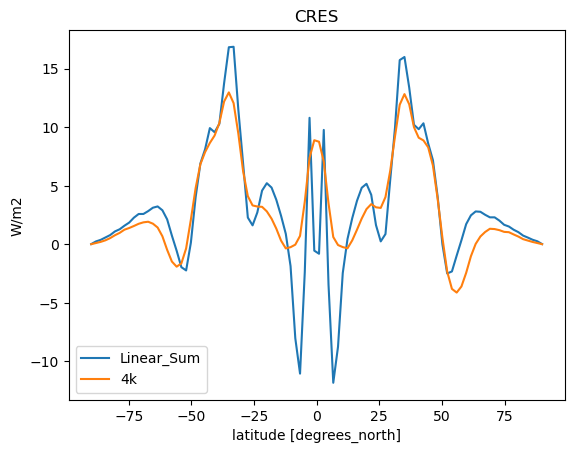

In [50]:
CRES_total.plot(label='Linear_Sum')
CRES_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("CRES")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

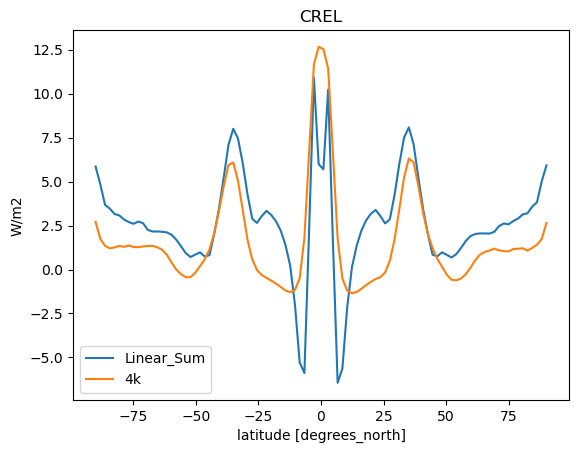

In [51]:
CREL_total.plot(label='Linear_Sum')
CREL_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("CREL")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

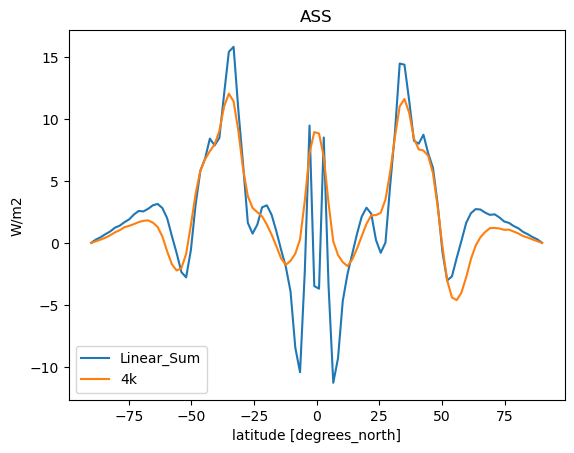

In [52]:
ass_total.plot(label='Linear_Sum')
ass_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("ASS")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

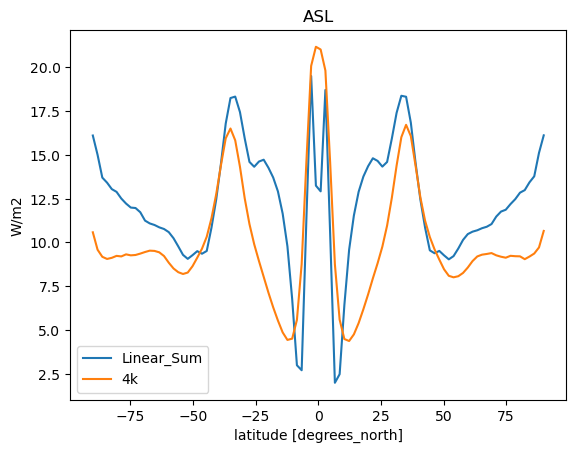

In [53]:
asl_total.plot(label='Linear_Sum')
asl_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("ASL")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

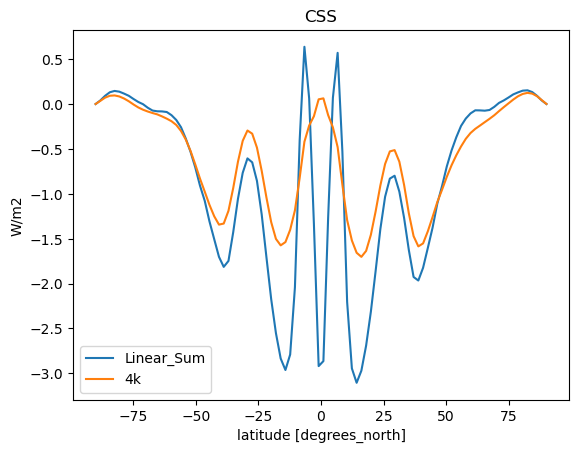

In [54]:
css_total.plot(label='Linear_Sum')
css_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("CSS")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

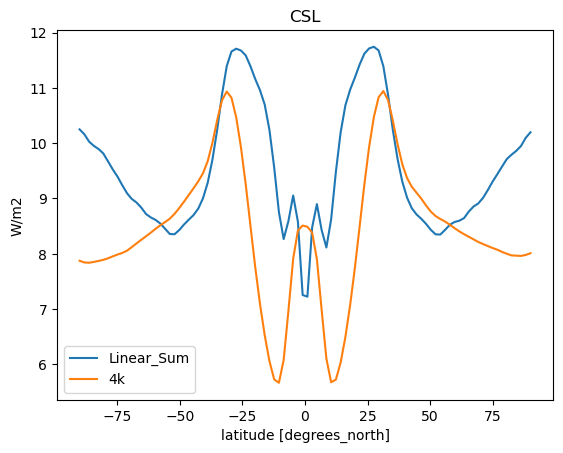

In [55]:
csl_total.plot(label='Linear_Sum')
csl_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("CSL")
plt.ylabel('W/m2')

In [56]:
# total clear sky
tcs_00=css_00-csl_00
tcs_25_n=css_25_n-csl_25_n
tcs_25_s=tcs_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
tcs_50_n=css_50_n-csl_50_n
tcs_50_s=tcs_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
tcs_75_n=css_75_n-csl_75_n
tcs_75_s=tcs_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
tcs_100_n=css_100_n-csl_100_n
tcs_100_s=tcs_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
tcs_125_n=css_125_n-csl_125_n
tcs_125_s=tcs_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

# total all sky
tas_00=ass_00-asl_00
tas_25_n=ass_25_n-asl_25_n
tas_25_s=tas_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
tas_50_n=ass_50_n-asl_50_n
tas_50_s=tas_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
tas_75_n=ass_75_n-asl_75_n
tas_75_s=tas_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
tas_100_n=ass_100_n-asl_100_n
tas_100_s=tas_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
tas_125_n=ass_125_n-asl_125_n
tas_125_s=tas_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))


#total CRE
tCRE_00=CRES_00-CREL_00
tCRE_25_n=CRES_25_n-CREL_25_n
tCRE_25_s=tCRE_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
tCRE_50_n=CRES_50_n-CREL_50_n
tCRE_50_s=tCRE_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
tCRE_75_n=CRES_75_n-CREL_75_n
tCRE_75_s=tCRE_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
tCRE_100_n=CRES_100_n-CREL_100_n
tCRE_100_s=tCRE_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
tCRE_125_n=CRES_125_n-CREL_125_n
tCRE_125_s=tCRE_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))

tcs_total=tcs_00+tcs_25_n+tcs_25_s+tcs_50_n+tcs_50_s+tcs_75_n+tcs_75_s+tcs_100_n+tcs_100_s+tcs_125_n+tcs_125_s
tcs_Exp_4k=css_Exp_4k-csl_Exp_4k

tas_total=tas_00+tas_25_n+tas_25_s+tas_50_n+tas_50_s+tas_75_n+tas_75_s+tas_100_n+tas_100_s+tas_125_n+tas_125_s
tas_Exp_4k=ass_Exp_4k-asl_Exp_4k

tCRE_total=tCRE_00+tCRE_25_s+tCRE_25_n+tCRE_50_s+tCRE_50_n+tCRE_75_s+tCRE_75_n+tCRE_100_s+tCRE_100_n+tCRE_125_s+tCRE_125_n
tCRE_Exp_4k=CRES_Exp_4k-CREL_Exp_4k

Text(0, 0.5, 'W/m2')

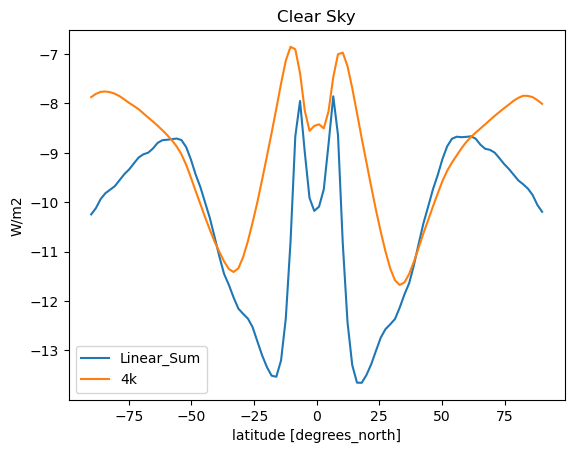

In [57]:
tcs_total.plot(label='Linear_Sum')
tcs_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("Clear Sky")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

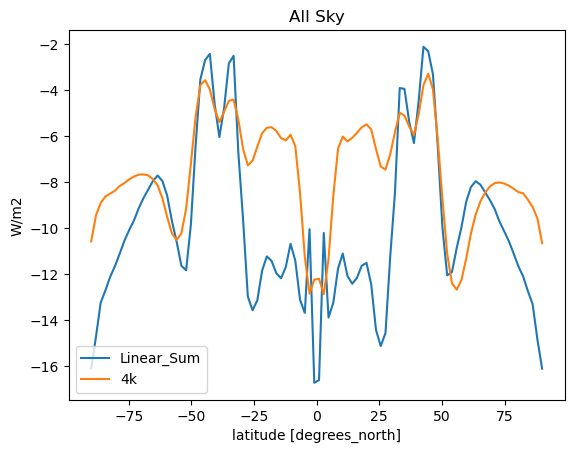

In [58]:
tas_total.plot(label='Linear_Sum')
tas_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title("All Sky")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

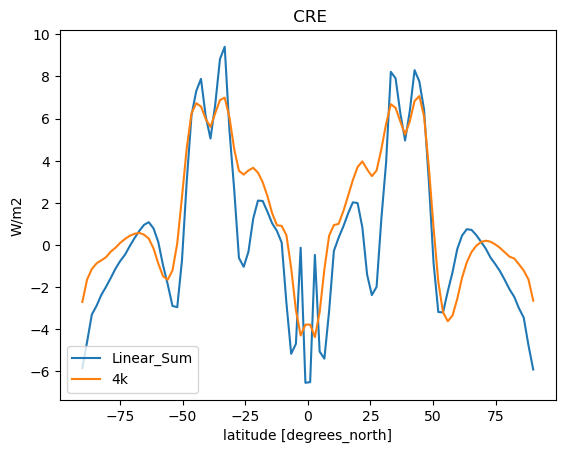

In [59]:
tCRE_total.plot(label='Linear_Sum')
tCRE_Exp_4k.plot(label='4k')
plt.legend(loc='lower left')
plt.title(" CRE")
plt.ylabel('W/m2')